<a href="https://colab.research.google.com/github/petepetersen423/DataProduct-W2-LeafletPeer/blob/master/Introduction_to_NLP_03_SentimentExample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis Python Example

* Author: Amy Zhuang
* Date: August 2020

## Sentiment Analysis Types


- Lexicon-based: The lexicon-based method has a dictionary of sentiment scores for each word in a sentence. The average sentiment score of each word in a sentence is used to calculate the sentiment of the whole sentence. There are two popular lexicon-based sentiment analysis python packages: TextBlob and VADER.
- Cloud API: Some cloud service providers have sentiment analysis as a service. This article provides a comparison of major cloud sentiment services. Such service usually has a cost associated with it. 
- Machine Learning Model: Machine learning model method uses predictive model to predict the sentiment of a document. Based on whether the predictors are bag of words or sequence, either a binary classification model (e.g., logistic regression, SVM, Naive Bayesian, Random Forest etc.) or a RNN model can be used.


## Mount Google Drive


In [ ]:
!pwd

/content


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir("drive/My Drive/Colab Notebooks")

In [ ]:
!pwd

/content/drive/My Drive/Colab Notebooks


## Verify GPU and TPU

In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
import os
if 'COLAB_TPU_ADDR' not in os.environ:
  print('Not connected to TPU')
else:
  print("Connected to TPU")

Connected to TPU


## Download Data

1. Go to: https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences
2. Click "Data Folder"
3. Download "sentiment labelled sentences.zip"
4. Unzip "sentiment labelled sentences.zip"
5. Copy the file "amazon_cells_labelled.txt" to Google drive

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, GRU, Flatten
from matplotlib import pyplot

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

## Readin Data

In [ ]:
colnames = ['sentence','target']
amz_review = pd.read_csv('amazon_cells_labelled.txt', sep='\t', names=colnames)
amz_review.head()

,sentence,target
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0
4,The mic is great.,1


In [ ]:
amz_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentence  1000 non-null   object
 1   target    1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [ ]:
amz_review['target'].value_counts()

1    500
0    500
Name: target, dtype: int64

## VADER

In [ ]:
!pip3 install -U nltk

     |████████████████████████████████| 1.5MB 2.9MB/s 
  Created wheel for nltk: filename=nltk-3.4.5-cp36-none-any.whl size=1449905 sha256=dc5aff3c3eeab29e0d871367a4e1d85a2d6ac22206ffec8da23ec4f3bcf77c6f
  Stored in directory: /root/.cache/pip/wheels/96/86/f6/68ab24c23f207c0077381a5e3904b2815136b879538a24b483
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
import nltk

In [ ]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
amz_review['scores_VADER'] = amz_review['sentence'].apply(lambda s: sia.polarity_scores(s)['compound'])
amz_review['pred_VADER'] = amz_review['scores_VADER'].apply(lambda x: 1 if x >=0 else 0)
amz_review.head()

,sentence,target,scores_VADER,pred_VADER
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,-0.3535,0
1,"Good case, Excellent value.",1,0.8402,1
2,Great for the jawbone.,1,0.6249,1
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,-0.6145,0
4,The mic is great.,1,0.6249,1


In [ ]:
amz_review.tail()

,sentence,target,scores_VADER,pred_VADER
995,The screen does get smudged easily because it touches your ear and face.,0,0.3400,1
996,What a piece of junk.. I lose more calls on this phone.,0,-0.4019,0
997,Item Does Not Match Picture.,0,0.0000,1
998,The only thing that disappoint me is the infra red port (irda).,0,-0.4019,0
999,"You can not answer calls with the unit, never worked once!",0,0.0000,1


In [ ]:
# Compare Actual and Predicted
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(amz_review['target'],amz_review['pred_VADER'])

0.758

In [ ]:
print(classification_report(amz_review['target'],amz_review['pred_VADER']))

              precision    recall  f1-score   support

           0       0.95      0.54      0.69       500
           1       0.68      0.97      0.80       500

    accuracy                           0.76      1000
   macro avg       0.82      0.76      0.75      1000
weighted avg       0.82      0.76      0.75      1000



In [ ]:
cm = confusion_matrix(amz_review['target'],amz_review['pred_VADER'])
cmtx = pd.DataFrame(cm, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no       272       228
true:yes       14       486


## Text Blob

In [ ]:
from textblob import TextBlob

amz_review['scores_TextBlob'] = amz_review['sentence'].apply(lambda s: TextBlob(s).sentiment.polarity)
amz_review['pred_TextBlob'] = amz_review['scores_TextBlob'].apply(lambda x: 1 if x >=0 else 0)
amz_review.head()

,sentence,target,scores_VADER,pred_VADER,score_TextBlob,pred_TextBlob,scores_TextBlob
0,So there is no way for me to plug it in here in the US unless I go by a converter.,0,-0.3535,0,0.000000,1,0.000000
1,"Good case, Excellent value.",1,0.8402,1,0.850000,1,0.850000
2,Great for the jawbone.,1,0.6249,1,0.800000,1,0.800000
3,Tied to charger for conversations lasting more than 45 minutes.MAJOR PROBLEMS!!,0,-0.6145,0,0.390625,1,0.390625
4,The mic is great.,1,0.6249,1,0.800000,1,0.800000


In [ ]:
amz_review.tail()

,sentence,target,scores_VADER,pred_VADER,score_TextBlob,pred_TextBlob,scores_TextBlob
995,The screen does get smudged easily because it touches your ear and face.,0,0.3400,1,0.433333,1,0.433333
996,What a piece of junk.. I lose more calls on this phone.,0,-0.4019,0,0.500000,1,0.500000
997,Item Does Not Match Picture.,0,0.0000,1,0.000000,1,0.000000
998,The only thing that disappoint me is the infra red port (irda).,0,-0.4019,0,0.000000,1,0.000000
999,"You can not answer calls with the unit, never worked once!",0,0.0000,1,0.000000,1,0.000000


In [ ]:
# Compare Actual and Predicted
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(amz_review['target'],amz_review['pred_TextBlob'])

0.688

In [ ]:
print(classification_report(amz_review['target'],amz_review['pred_TextBlob']))

              precision    recall  f1-score   support

           0       0.93      0.41      0.57       500
           1       0.62      0.97      0.76       500

    accuracy                           0.69      1000
   macro avg       0.77      0.69      0.66      1000
weighted avg       0.77      0.69      0.66      1000



In [ ]:
cm = confusion_matrix(amz_review['target'],amz_review['pred_TextBlob'])
cmtx = pd.DataFrame(cm, index=['true:no', 'true:yes'], columns=['pred:no', 'pred:yes'])
print(cmtx)

          pred:no  pred:yes
true:no       204       296
true:yes       16       484


## Comparision in Distribution

# New Section

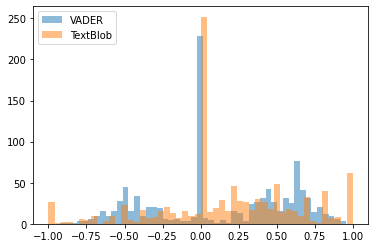

In [ ]:
pyplot.hist(amz_review['scores_VADER'], bins=50, alpha=0.5, label='VADER')
pyplot.hist(amz_review['scores_TextBlob'], bins=50, alpha=0.5, label='TextBlob')
pyplot.legend(loc='upper left')
pyplot.show()

## Data Preprocessing for Models

In [ ]:
X, y = (amz_review['sentence'].values, amz_review['target'].values) #RNN input requires array data type

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [ ]:
# check the max length of the sentences.
amz_review.sentence.str.len().max()

149

In [ ]:
tk = Tokenizer(lower = True)
tk.fit_on_texts(X)
X_seq = tk.texts_to_sequences(X)
X_pad = pad_sequences(X_seq, maxlen=20, padding='post')

In [ ]:
type(X_pad)

numpy.ndarray

In [ ]:
X_pad[0]

array([117,   5,  53, 214,  11,  47,   8, 155,   4,  19, 337,  19,   1,
       546, 416,   2, 241, 190,   6, 812], dtype=int32)

In [ ]:
X[0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.20, random_state = 0)

## Build RNN LSTM Model

The embedding layer represent each word using a vector. ```input_dim```is the size of the volcabulary. ```output_dim``` is the dimension of the embedding vector. ```input_length```is the length of the padded sequence.
The LSTM layer contains multiple parallel LSTM units, structurally identical but each eventually "learning to remember" some different thing.


In [ ]:
import tensorflow as tf; print(tf.__version__)

2.3.0


In [ ]:
model = Sequential()
model.add(Embedding(input_dim=len(tk.word_counts.keys())+1, output_dim=128,input_length = 20))
model.add(LSTM(units=200, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
model.fit(X_train, y_train, batch_size=50, epochs = 20)

Epoch 1/20
16/16 [==============================] - 2s 94ms/step - loss: 0.6939 - accuracy: 0.4963
Epoch 2/20
16/16 [==============================] - 1s 93ms/step - loss: 0.6495 - accuracy: 0.6225
Epoch 3/20
16/16 [==============================] - 1s 93ms/step - loss: 0.3316 - accuracy: 0.8600
Epoch 4/20
16/16 [==============================] - 1s 94ms/step - loss: 0.1320 - accuracy: 0.9500
Epoch 5/20
16/16 [==============================] - 1s 93ms/step - loss: 0.0560 - accuracy: 0.9887
Epoch 6/20
16/16 [==============================] - 2s 94ms/step - loss: 0.0616 - accuracy: 0.9837
Epoch 7/20
16/16 [==============================] - 1s 93ms/step - loss: 0.0265 - accuracy: 0.9950
Epoch 8/20
16/16 [==============================] - 1s 92ms/step - loss: 0.0050 - accuracy: 0.9987
Epoch 9/20
16/16 [==============================] - 1s 93ms/step - loss: 0.0105 - accuracy: 0.9962
Epoch 10/20
16/16 [==============================] - 2s 95ms/step - loss: 0.0077 - accuracy: 0.9975
Epoch 11/

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 128)           240512    
_________________________________________________________________
lstm_1 (LSTM)                (None, 200)               263200    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 503,913
Trainable params: 503,913
Non-trainable params: 0
_________________________________________________________________


In [ ]:
len(tk.word_counts.keys())+1

1879

In [ ]:
# 1st layer number of parameters: number of input_dim*output_dim
1879*128

240512

In [ ]:
# 2nd LSTM layer number of parameters: 4*(output_dim_of_last_layer*units+units**2+units) 
4*(128*200+200*200+200)

263200

In [ ]:
# 3rd output layer number of parameters: output_dim_of_last_layer*output_dim_of_this_layer+output_dim_of_this_layer
200*1+1

201

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 82.50%


## Build RNN GRU (Gated Recurrent Unit) Model

The key difference between a GRU and an LSTM is that a GRU has two gates (reset and update gates) whereas an LSTM has three gates (namely input, output and forget gates)

In [ ]:
model_gru = Sequential()
model_gru.add(Embedding(input_dim=len(tk.word_counts.keys())+1, output_dim=128,input_length = 20))
model_gru.add(GRU(200))
model_gru.add(Dense(1, activation='sigmoid'))
model_gru.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model_gru.fit(X_train, y_train, batch_size=50, epochs = 20)

Epoch 1/20
16/16 [==============================] - 1s 63ms/step - loss: 0.6944 - accuracy: 0.4875
Epoch 2/20
16/16 [==============================] - 1s 64ms/step - loss: 0.6912 - accuracy: 0.5550
Epoch 3/20
16/16 [==============================] - 1s 63ms/step - loss: 0.6835 - accuracy: 0.5550
Epoch 4/20
16/16 [==============================] - 1s 64ms/step - loss: 0.6017 - accuracy: 0.6463
Epoch 5/20
16/16 [==============================] - 1s 64ms/step - loss: 0.2792 - accuracy: 0.8950
Epoch 6/20
16/16 [==============================] - 1s 64ms/step - loss: 0.0989 - accuracy: 0.9675
Epoch 7/20
16/16 [==============================] - 1s 64ms/step - loss: 0.0293 - accuracy: 0.9937
Epoch 8/20
16/16 [==============================] - 1s 65ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 9/20
16/16 [==============================] - 1s 65ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 10/20
16/16 [==============================] - 1s 62ms/step - loss: 3.0631e-04 - accuracy: 1.0000
Epoch

In [ ]:
scores = model_gru.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 84.10%
